In [ ]:
!pip install networkx

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------------------ --- 1.6/1.7 MB 13.9 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 10.4 MB/s eta 0:00:00


In [131]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Exercise: Calculating node degree (1)

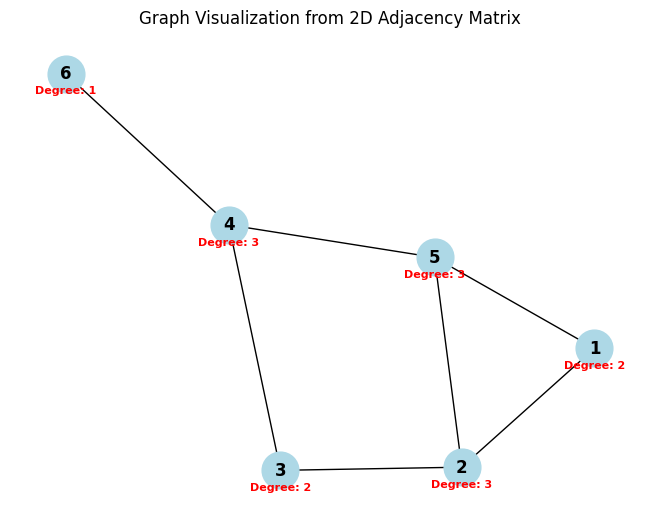

Degrees of each node: [2 3 2 3 3 1]
Mean degree of the graph: 2.3333333333333335


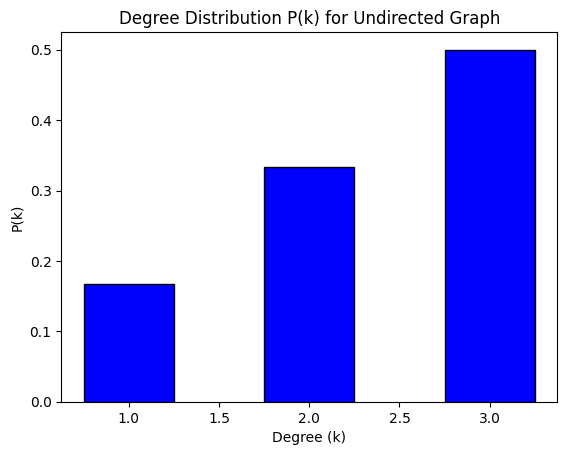

Degree distribution P(k): {np.int64(1): np.float64(0.16666666666666666), np.int64(2): np.float64(0.3333333333333333), np.int64(3): np.float64(0.5)}


In [145]:
# Given 2D array matrix
data = np.array([[0,1,0,0,1,0],
                 [1,0,1,0,1,0],
                 [0,1,0,1,0,0],
                 [0,0,1,0,1,1],
                 [1,1,0,1,0,0],
                 [0,0,0,1,0,0]])

# Create a graph from 2D matrix
A = nx.Graph()

# Add edges from 2D matrix
rows, cols = np.where(data == 1)
edges = list(zip(rows + 1, cols + 1))  # Adjust node indices to start from 1
A.add_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(A)  # Positions for all nodes
nx.draw(A, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=12, font_weight='bold')
labels = {node: f'\n \n \nDegree: {A.degree[node]}' for node in A.nodes()}
nx.draw_networkx_labels(A, pos, labels, font_color='red', font_size=8, font_weight='bold')

plt.title('Graph Visualization from 2D Adjacency Matrix')
plt.show()

# Calculate degree for each node
degrees = np.sum(data, axis=1)

# Calculate mean degree 
mean_k = np.mean(degrees)

# Calculate the distribution P(k)
unique_degrees, counts = np.unique(degrees, return_counts=True)
P_k = counts / counts.sum()

print("Degrees of each node:", degrees)
print("Mean degree of the graph:", mean_k)

# Plot the degree distribution
plt.bar(unique_degrees, P_k, width=0.5, color='blue', edgecolor='black')
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.title('Degree Distribution P(k) for Undirected Graph')
plt.show()
print("Degree distribution P(k):", dict(zip(unique_degrees, P_k)))

### Exercise: Calculating node degree (2)

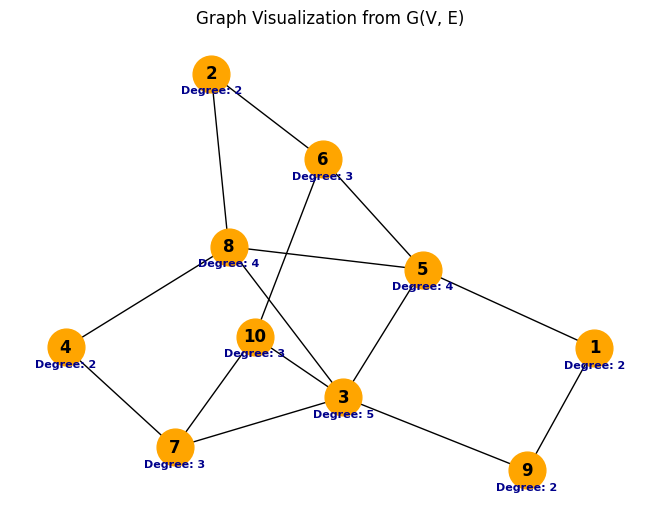

Degrees of each node: {1: 2, 2: 2, 3: 5, 4: 2, 5: 4, 6: 3, 7: 3, 8: 4, 9: 2, 10: 3}
Mean degree of the graph: 3.0


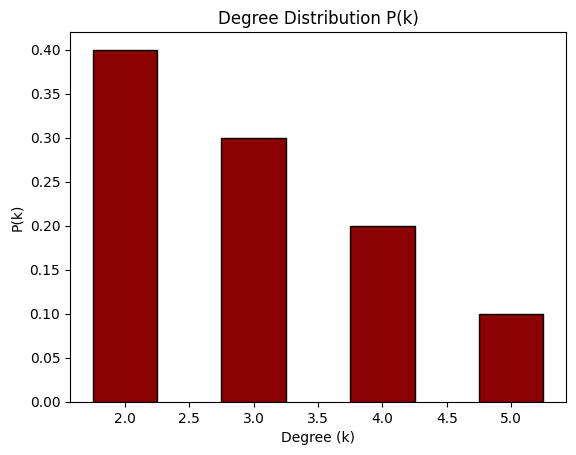

Degree Distribution P(k): {np.int64(2): np.float64(0.4), np.int64(3): np.float64(0.3), np.int64(4): np.float64(0.2), np.int64(5): np.float64(0.1)}


In [155]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of nodes and edges
num_nodes = int(input())
num_edges = int(input()) ## should be greater than number of nodes

# Generate random edges
edges = set()
while len(edges) < num_edges:
    u = np.random.randint(1, num_nodes + 1)
    v = np.random.randint(1, num_nodes + 1)
    if u != v:
        edges.add((u, v))

# Define the vertices and edges
V = list(range(1, num_nodes + 1))
E = list(edges)

# Create the graph
B = nx.Graph()
B.add_nodes_from(V)
B.add_edges_from(E)

# Draw the graph
pos = nx.spring_layout(B)
nx.draw(B, pos, with_labels=True, node_size=700, node_color='orange', font_size=12, font_weight='bold')
labels = {node: f'\n \n \nDegree: {B.degree[node]}' for node in B.nodes()}
nx.draw_networkx_labels(B, pos, labels, font_color='darkblue', font_size=8, font_weight='bold')

plt.title('Graph Visualization from G(V, E)')
plt.show()


# Calculate degree for each node 
degrees = dict(B.degree())

# Calculate the mean degree
mean_k = np.mean(list(degrees.values()))

# Calculate the distribution P(k)
unique_degrees, counts = np.unique(list(degrees.values()), return_counts=True)
P_k = counts / counts.sum()

print("Degrees of each node:", degrees)
print("Mean degree of the graph:", mean_k)

# Plot the degree distribution
plt.bar(unique_degrees, P_k, width=0.5, color='darkred', edgecolor='black')
plt.xlabel('Degree (k)')
plt.ylabel('P(k)')
plt.title('Degree Distribution P(k)')
plt.show()

print("Degree Distribution P(k):", dict(zip(unique_degrees, P_k)))

### Exercise: Calculating node degree (3)

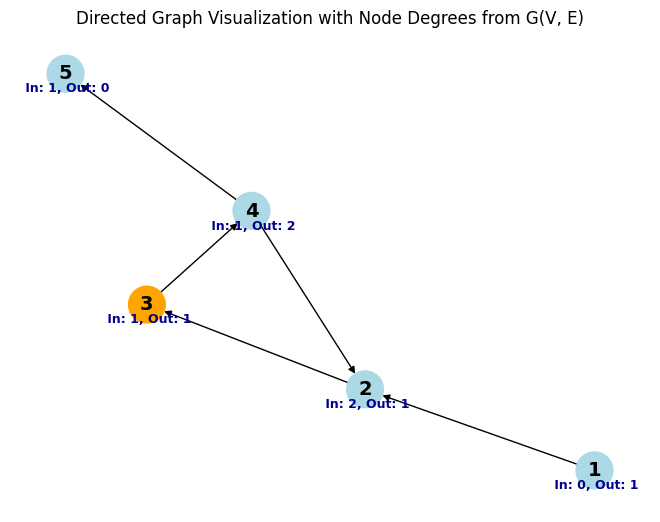

In-degrees of each node: {1: 0, 2: 2, 3: 1, 4: 1, 5: 1}
Out-degrees of each node: {1: 1, 2: 1, 3: 1, 4: 2, 5: 0}
Total degrees of each node: {1: 1, 2: 3, 3: 2, 4: 3, 5: 1}
Nodes where in-degree or out-degree equals total degree: [3]
In-degree and Out-degree of each node: {1: {'in_degree': 0, 'out_degree': 1}, 2: {'in_degree': 2, 'out_degree': 1}, 3: {'in_degree': 1, 'out_degree': 1}, 4: {'in_degree': 1, 'out_degree': 2}, 5: {'in_degree': 1, 'out_degree': 0}}


In [198]:
# Define the vertices and edges
V = [1, 2, 3, 4, 5]
E = [(1, 2), (2, 3), (3, 4), (4, 2), (4, 5)]

# Create a directed graph
C = nx.DiGraph()
C.add_nodes_from(V)
C.add_edges_from(E)

# Calculate in-degree, out-degree, and total degree for each node
in_degrees = dict(C.in_degree())
out_degrees = dict(C.out_degree())
total_degrees = {node: in_degrees[node] + out_degrees[node] for node in C.nodes()}

# Identify nodes where in-degree or out-degree equals the total degree 
nodes_with_equal_degrees = [node for node in C.nodes() if in_degrees[node] == out_degrees[node]]

# Draw the graph with node labels showing in-degree and out-degree
pos = nx.spring_layout(C)
node_color = ['lightblue' if node not in nodes_with_equal_degrees else 'orange' for node in C.nodes()] # Highlight nodes with equal in/out degrees
nx.draw(C, pos, with_labels=True, node_size=700, node_color=node_color, font_size=14, font_weight='bold')
labels = {node: f'\n\n In: {C.in_degree(node)}, Out: {C.out_degree(node)}' for node in C.nodes()}
nx.draw_networkx_labels(C, pos, labels, font_color='darkblue', font_size=9, font_weight='bold')
plt.title('Directed Graph Visualization with Node Degrees from G(V, E)')
plt.show()

# Combine in-degree and out-degree for each node
combined_degrees = {node: {'in_degree': in_degrees[node],'out_degree': out_degrees[node]} for node in C.nodes()}
print("In-degrees of each node:", in_degrees)
print("Out-degrees of each node:", out_degrees)
print("Total degrees of each node:", total_degrees)
print("Nodes where in-degree or out-degree equals total degree:", nodes_with_equal_degrees)
print("In-degree and Out-degree of each node:", combined_degrees)